In [1]:
%%time
import os
from glob import glob
import cv2
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt

%matplotlib inline


Wall time: 1min 25s


In [13]:
# ../input/
#PATH = os.path.abspath(os.path.join('.'))
#cambiar al directorio raiz del trabajo
PATH = "D:\\OneDrive\\Documentos\\Profesional\\Master UAH-IUTA\\Temario\\TFM\\trabajo\\Modelo\\Datos"

# ../input/sample/images/
SOURCE_IMAGES = os.path.join(PATH,"sample", "images")
\
# ../input/sample/images/*.png
imagesDir = glob(os.path.join(SOURCE_IMAGES, "*.png"))

In [14]:
print(PATH)
print(SOURCE_IMAGES)

D:\OneDrive\Documentos\Profesional\Master UAH-IUTA\Temario\TFM\trabajo\Modelo\Datos
D:\OneDrive\Documentos\Profesional\Master UAH-IUTA\Temario\TFM\trabajo\Modelo\Datos\sample\images


In [15]:
imagesDir[:10]

['D:\\OneDrive\\Documentos\\Profesional\\Master UAH-IUTA\\Temario\\TFM\\trabajo\\Modelo\\Datos\\sample\\images\\00000013_005.png',
 'D:\\OneDrive\\Documentos\\Profesional\\Master UAH-IUTA\\Temario\\TFM\\trabajo\\Modelo\\Datos\\sample\\images\\00000013_026.png',
 'D:\\OneDrive\\Documentos\\Profesional\\Master UAH-IUTA\\Temario\\TFM\\trabajo\\Modelo\\Datos\\sample\\images\\00000017_001.png',
 'D:\\OneDrive\\Documentos\\Profesional\\Master UAH-IUTA\\Temario\\TFM\\trabajo\\Modelo\\Datos\\sample\\images\\00000030_001.png',
 'D:\\OneDrive\\Documentos\\Profesional\\Master UAH-IUTA\\Temario\\TFM\\trabajo\\Modelo\\Datos\\sample\\images\\00000032_001.png',
 'D:\\OneDrive\\Documentos\\Profesional\\Master UAH-IUTA\\Temario\\TFM\\trabajo\\Modelo\\Datos\\sample\\images\\00000040_003.png',
 'D:\\OneDrive\\Documentos\\Profesional\\Master UAH-IUTA\\Temario\\TFM\\trabajo\\Modelo\\Datos\\sample\\images\\00000042_002.png',
 'D:\\OneDrive\\Documentos\\Profesional\\Master UAH-IUTA\\Temario\\TFM\\trabajo\\Mo

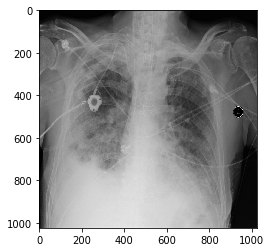

In [12]:
cvimage = cv2.imread(imagesDir[10],1)
plt.imshow(cvimage); #cvimage is a numpy array

### Creación de lista de imágenes leidas de ficheros

In [6]:
for im in imagesDir:
    a = cv2.imread(im)
    if (abs(a[:,:,0]-a[:,:,1]).sum() + abs(a[:,:,0]-a[:,:,2]).sum()) != 0:
        print("Error en imagen", im)

In [7]:
im

'D:\\OneDrive\\Documentos\\Profesional\\Master UAH-IUTA\\Temario\\TFM\\Trabajo Redes Convolutivas\\sample\\images\\00030797_000.png'

In [8]:
%%time
Xrays256_BW = [(cv2.resize(cv2.imread(img,0), (256, 256),
                           interpolation = cv2.INTER_AREA)/255).astype(np.float32)
               for img in imagesDir]

Wall time: 1min 4s


In [9]:
type(Xrays256_BW)

list

In [10]:
np.shape(Xrays256_BW)

(5606, 256, 256)

### Creación de etiquetas

In [11]:
sample_labels = pd.read_csv(PATH+"\\"+'sample_labels.csv')
pathology_list = ['Cardiomegaly', 'Emphysema', 'Effusion'
                  'Hernia', 'Nodule', 'Pneumothorax',
                  'Atelectasis', 'Pleural_Thickening', 'Mass',
                  'Edema', 'Consolidation', 'Infiltration',
                  'Fibrosis', 'Pneumonia', 'No Finding']

In [12]:
sample_labels[:3]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168


In [13]:
for pathology in pathology_list:
    sample_labels[pathology] = sample_labels['Finding Labels'].map(lambda x: 1 if pathology in x else 0)

In [14]:
sample_labels[:3]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,No Finding
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,...,1,0,1,0,0,0,1,0,0,0
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,1


In [15]:
sample_labels.columns[-len(pathology_list):]

Index(['Cardiomegaly', 'Emphysema', 'EffusionHernia', 'Nodule', 'Pneumothorax',
       'Atelectasis', 'Pleural_Thickening', 'Mass', 'Edema', 'Consolidation',
       'Infiltration', 'Fibrosis', 'Pneumonia', 'No Finding'],
      dtype='object')

In [16]:
len(pathology_list)

14

In [17]:
binary_labels = sample_labels.iloc[:,-1].values.reshape(-1,1)
multiclass_labels = sample_labels.iloc[:,-len(pathology_list):].values

In [18]:
a = list(sample_labels.columns)
#aux_labels = sample_labels.iloc[:,[a.index('Nodule'), a.index('Mass'), a.index('Atelectasis'), a.index('Consolidation') ]].values
#aux_labels = sample_labels.iloc[:,[a.index('Nodule'), a.index('Mass'), a.index('Atelectasis') ]].values
#aux_labels = sample_labels.iloc[:,[a.index('Nodule'), a.index('Mass'), a.index('Consolidation') ]].values
aux_labels = sample_labels.iloc[:,[a.index('Nodule'), a.index('Mass')]].values

In [19]:
aux_labels[:10]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [20]:
cancer_labels=(np.sum(aux_labels, axis=1)>=1).astype(int)

In [21]:
index_cancer = np.where(cancer_labels==1)[0]
index_no_cancer = np.where(cancer_labels==0)[0]

In [22]:
with open("datos_Xrays256_BW", "wb") as f:
    pickle.dump(Xrays256_BW, f)
    pickle.dump(pathology_list, f)
    pickle.dump(binary_labels, f)
    pickle.dump(multiclass_labels, f)
    pickle.dump(cancer_labels, f)
    pickle.dump(index_cancer, f)
    pickle.dump(index_no_cancer, f)

In [23]:
type(Xrays256_BW[0][0,0])

numpy.float32

In [28]:
np.shape(index_cancer)[0]/ np.shape(cancer_labels)[0]

0.09864430966821262